In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>Importing Data</h1>

In [2]:
dengue = pd.read_csv("datasets//dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Data Preparetion</h1>

In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [6]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [7]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>Insights</h1>

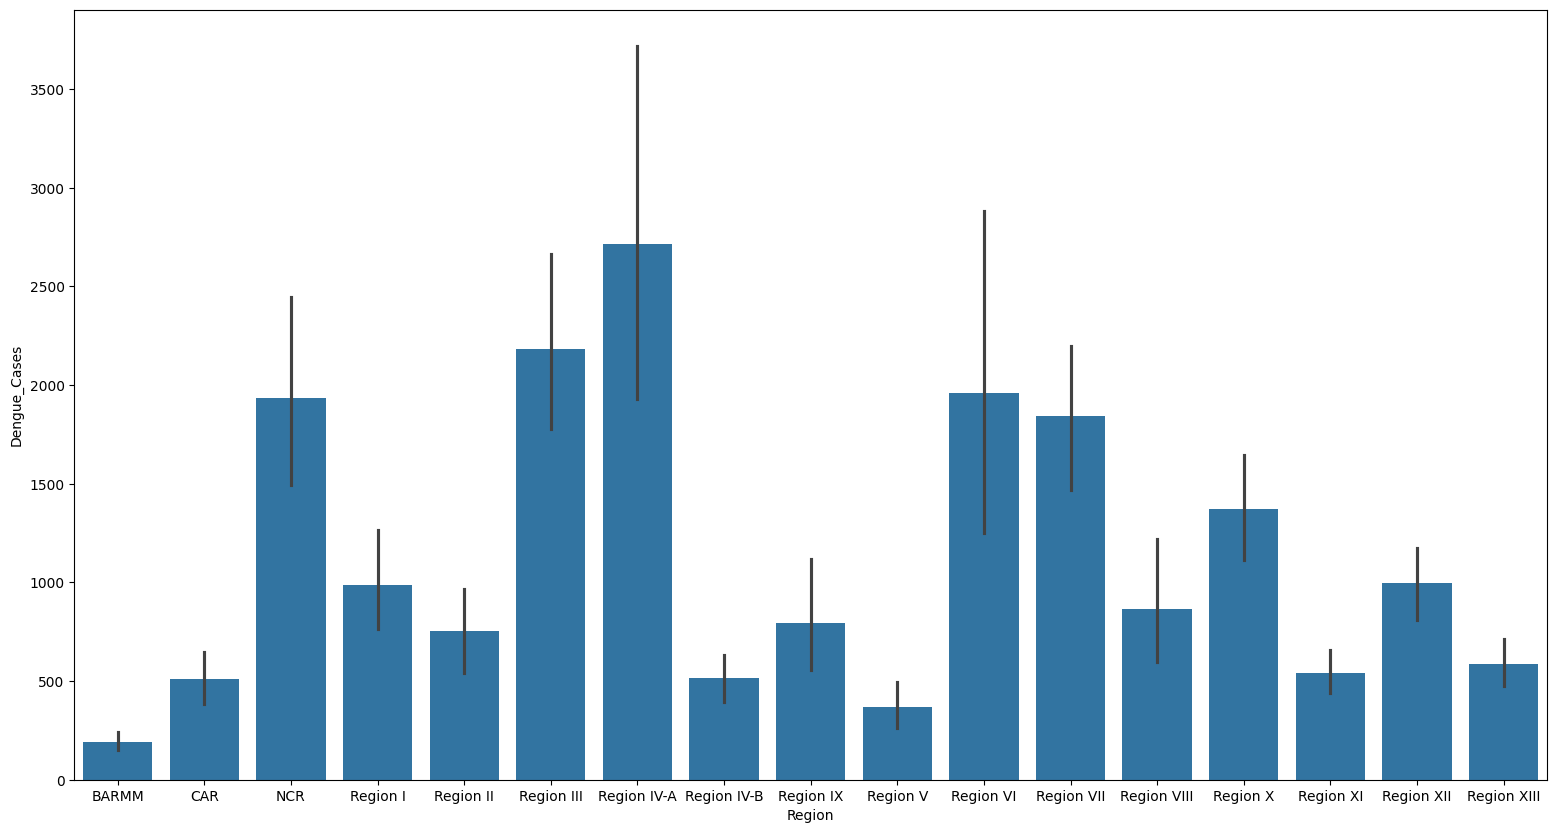

In [8]:
sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

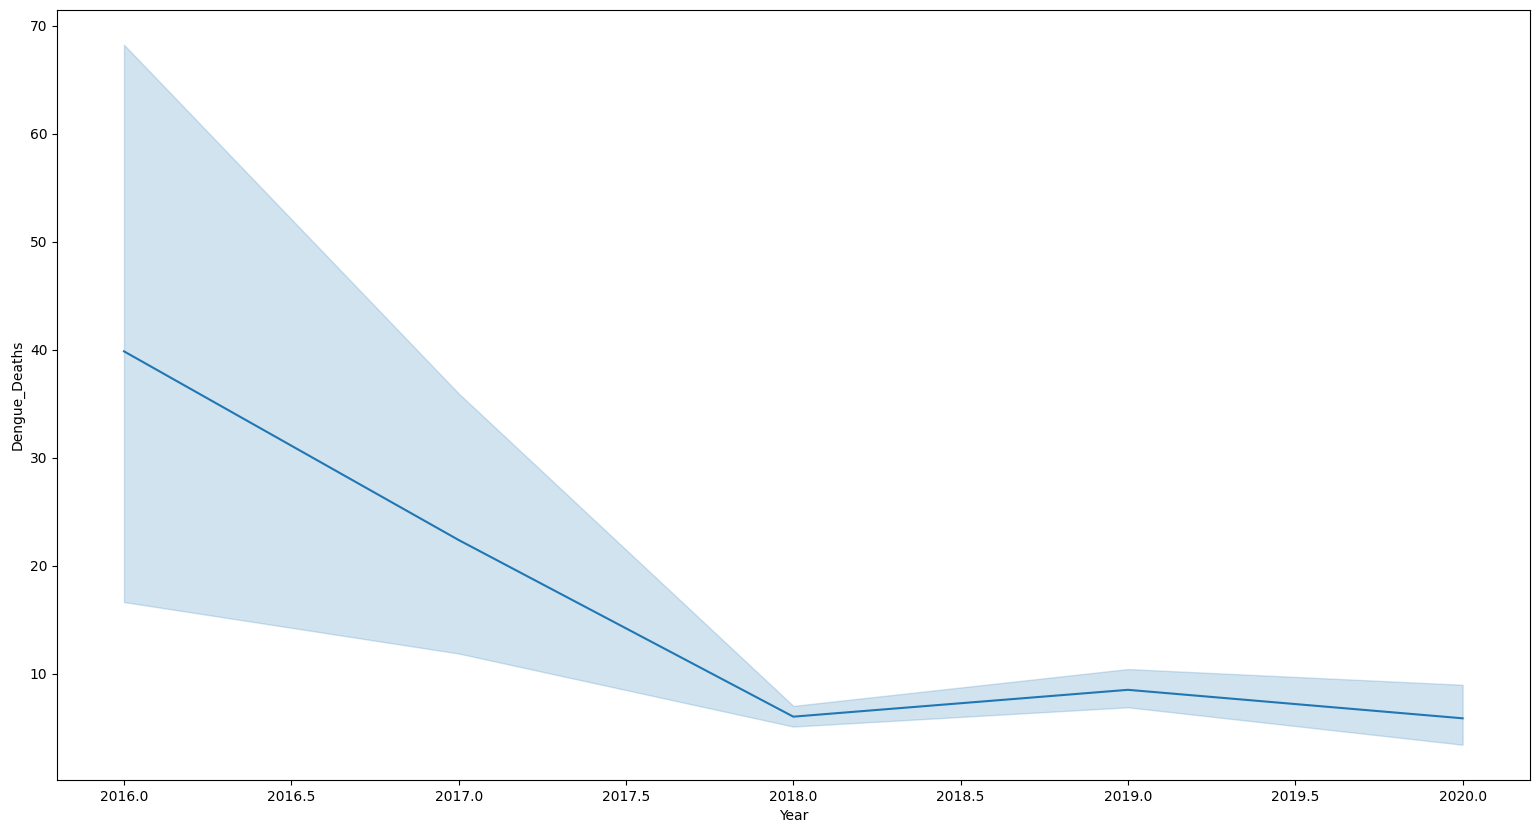

In [9]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 10)
plt.show()

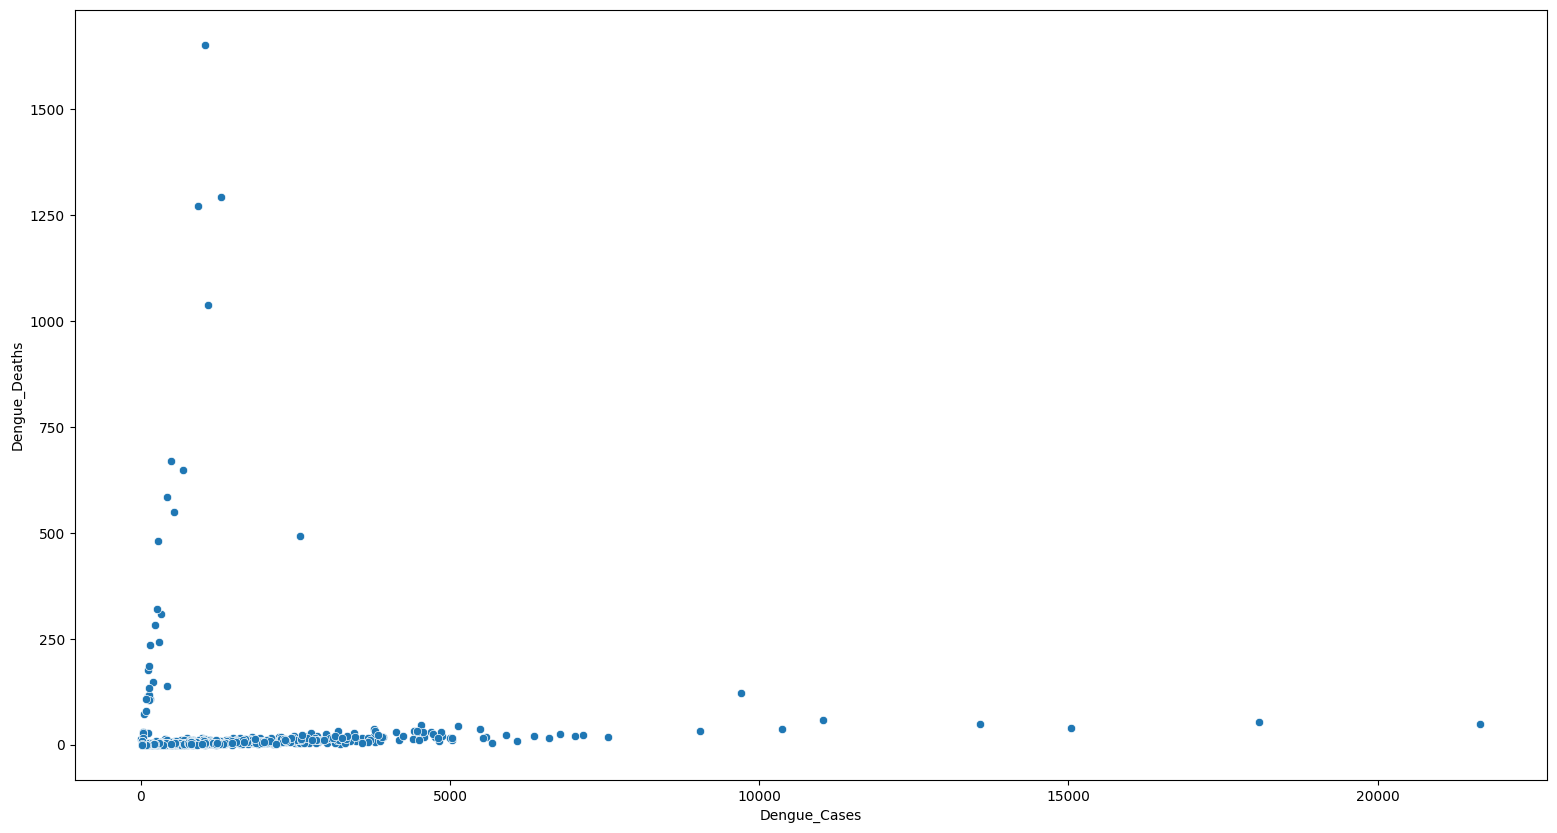

In [10]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 10)
plt.show()

In [11]:
dengue_year = dengue[dengue["Year"] != 2019]

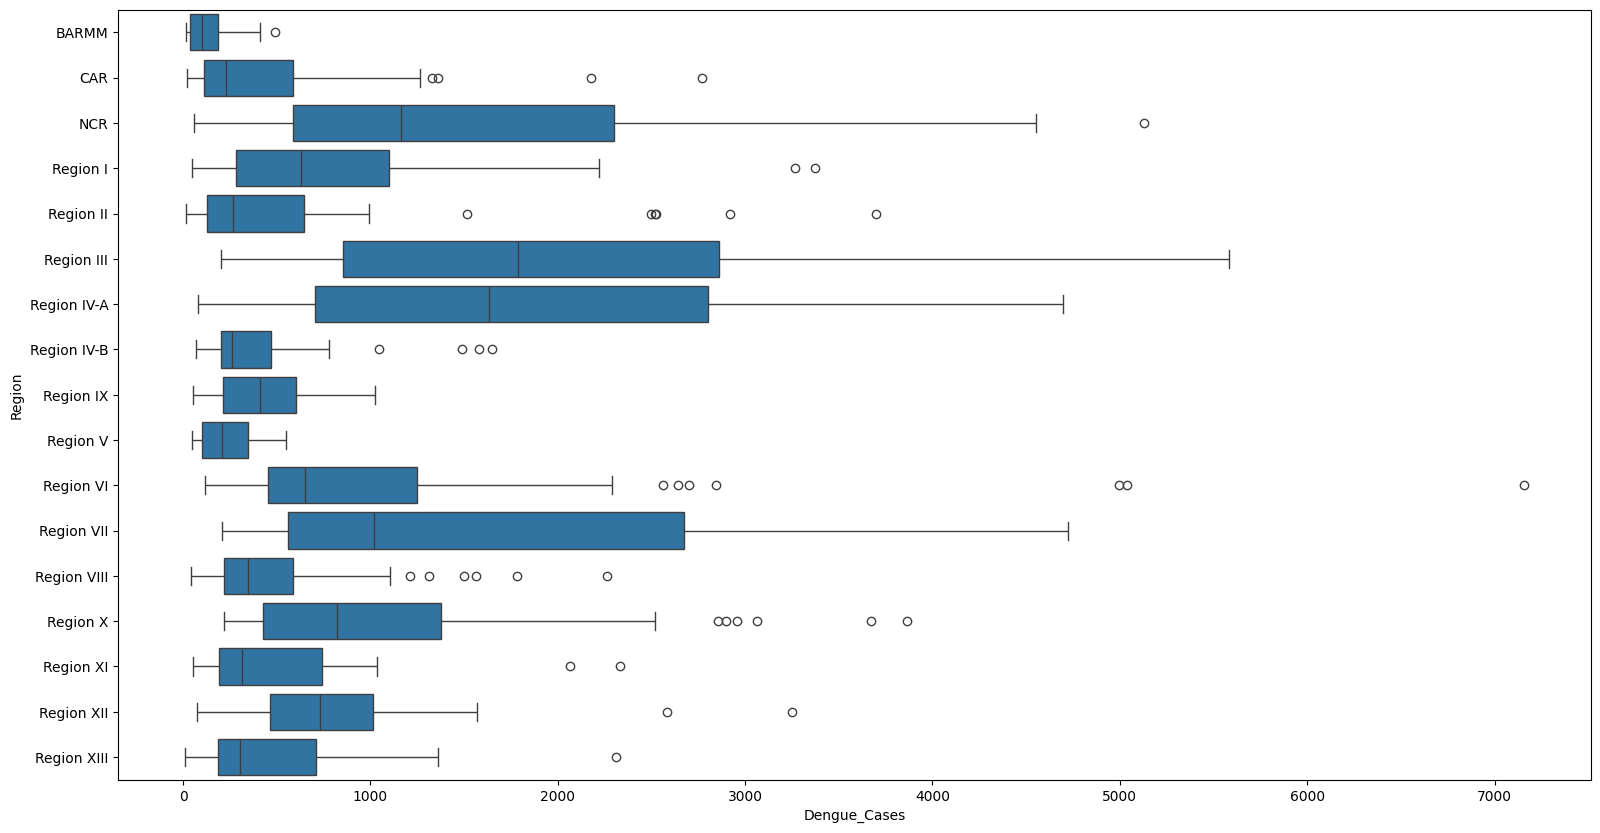

In [12]:
sns.boxplot(data=dengue_year, y="Region", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 10)
plt.show()

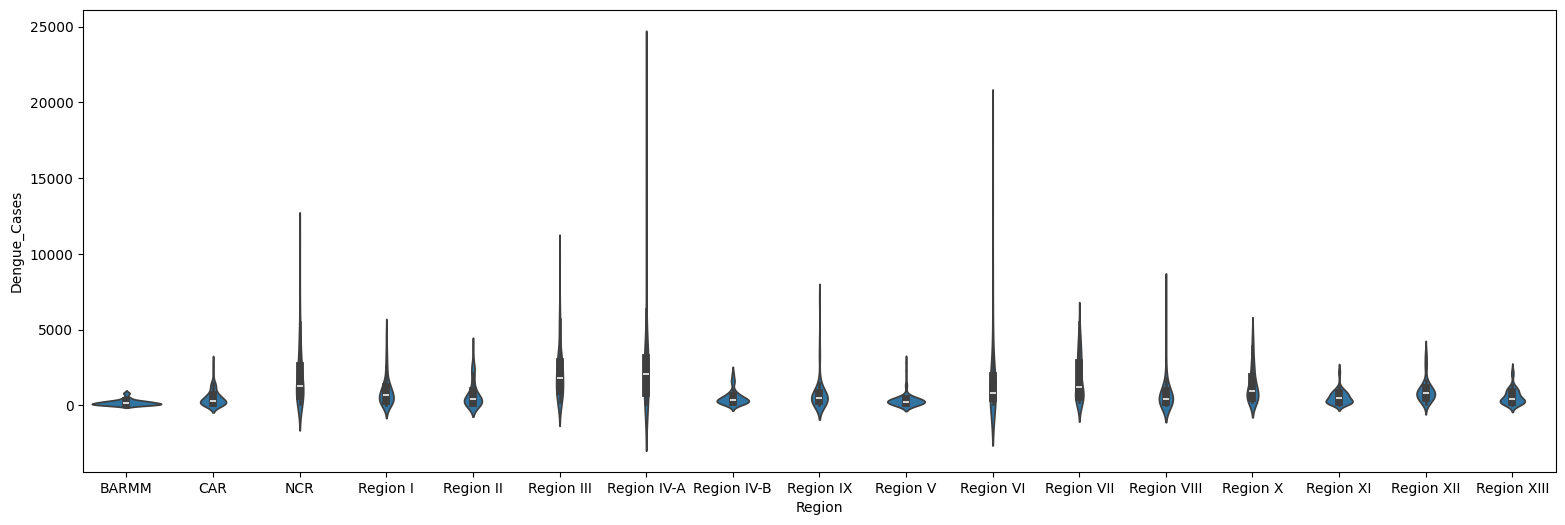

In [13]:
sns.violinplot(data=dengue, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>History :</h1>
<ul>
    <li>
        Dengue fever, a mosquito-borne viral infection, is a significant health concern, especially in tropical and subtropical regions, and can cause a range of symptoms from mild to severe, including high fever, headaches, and body aches. 
    </li>
</ul>

<h1>Insight No. 1</h1>
<p>What year is the peak of dengue disease?</p>
<ul>
    <li>
        Dengue Cases peaked at the year 2019
    </li>
</ul>

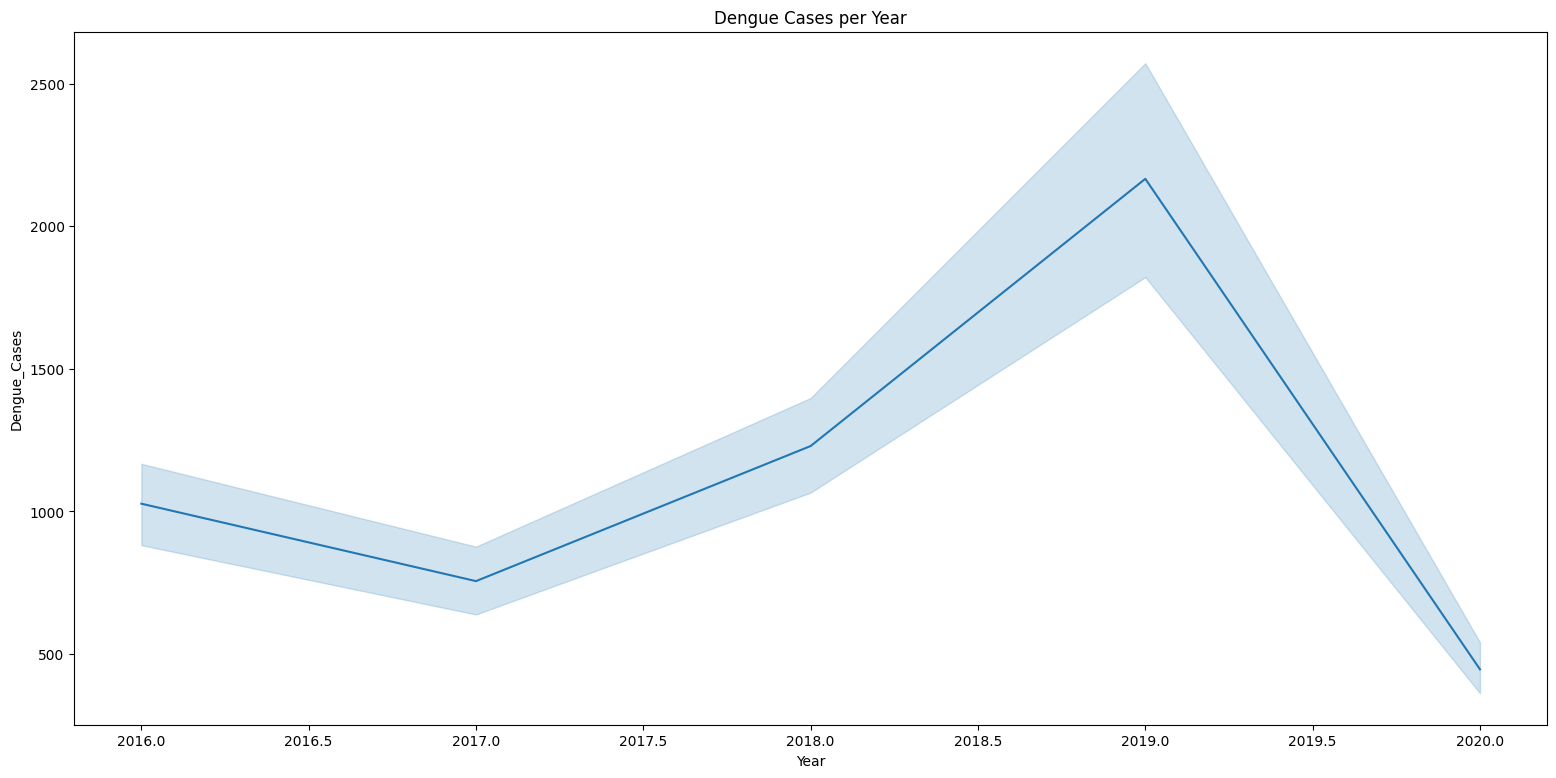

In [14]:
sns.lineplot(data=dengue, y="Dengue_Cases", x="Year")
plt.title('Dengue Cases per Year')
plt.gcf().set_size_inches(19, 9)
plt.show()

<h1>Insight No. 2</h1>
<p>What is the average cases per month?</p>
<ul>
    <li>
        The month of August averaged higher than the other month. Given that August is a rainy season
    </li>
</ul>

In [15]:
monthly_average = dengue.groupby(['Region', 'Month'])[['Dengue_Cases', 'Dengue_Deaths']].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_average['Month'] = pd.Categorical(monthly_average['Month'], categories=month_order, ordered=True)
monthly_average = monthly_average.sort_values(['Month', 'Region'])
monthly_average.sort_values(by = "Dengue_Cases", ascending=False)

,Region,Month,Dengue_Cases,Dengue_Deaths
83,Region IV-A,September,6512.0,23.4
121,Region VI,August,6129.6,21.2
73,Region IV-A,August,5086.6,15.4
125,Region VI,July,4644.6,18.8
71,Region III,September,4453.8,31.4
...,...,...,...,...
2,BARMM,December,140.4,1.4
8,BARMM,May,132.4,1.4
12,CAR,April,122.4,0.4
116,Region V,May,115.4,1.0


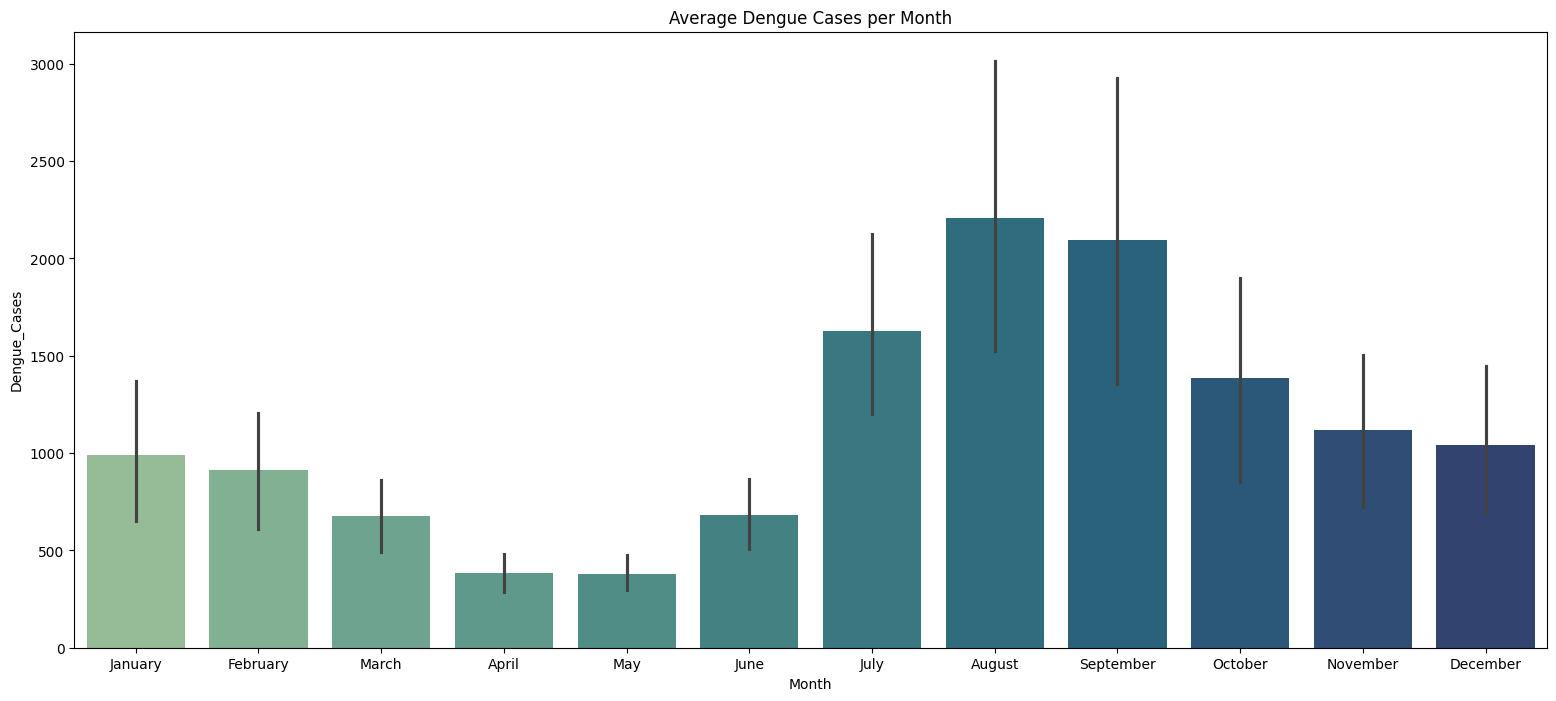

In [16]:
sns.barplot(data=monthly_average, x='Month', y='Dengue_Cases', palette='crest')
plt.title('Average Dengue Cases per Month')
plt.gcf().set_size_inches(19, 8)
plt.show()

<h1>Insight No. 3</h1>
<p>What month has the highest death average per month?</p>
<ul>
    <li>
        September and October has the highest average deaths in all of the months. It is rainy season and the patient diagnosed with dengue only lasts a month or two.
    </li>
</ul>

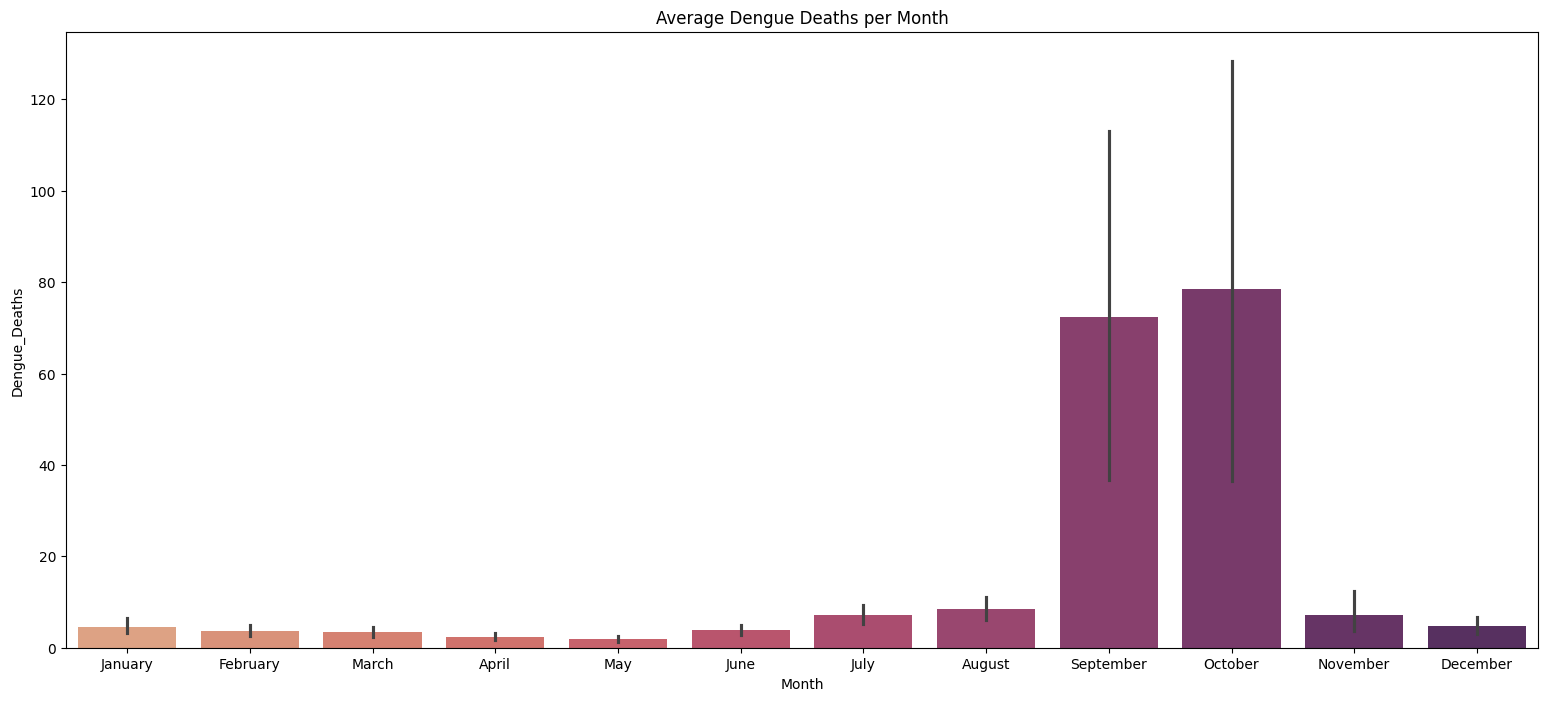

In [17]:
sns.barplot(data=monthly_average, x='Month', y='Dengue_Deaths', palette='flare')
plt.title('Average Dengue Deaths per Month')
plt.gcf().set_size_inches(19, 8)
plt.show()

<h1>Insight No. 4 - 5</h1>
<p>Highest dengue cases and deaths over the entire dataset</p>
<ul>
    <li>
        Region IV-A has the most cases and NCR Region has the most deaths recorded.
    </li>
</ul>

In [18]:
data_dengue = dengue.groupby(['Region'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
data_dengue.sort_values(by='Dengue_Cases', ascending=False)

,Region,Dengue_Cases,Dengue_Deaths
6,Region IV-A,163029,652
5,Region III,131064,482
10,Region VI,117523,1825
2,NCR,115966,4008
11,Region VII,110683,1760
13,Region X,82437,848
15,Region XII,59802,2796
3,Region I,59066,157
12,Region VIII,51983,585
8,Region IX,47781,532


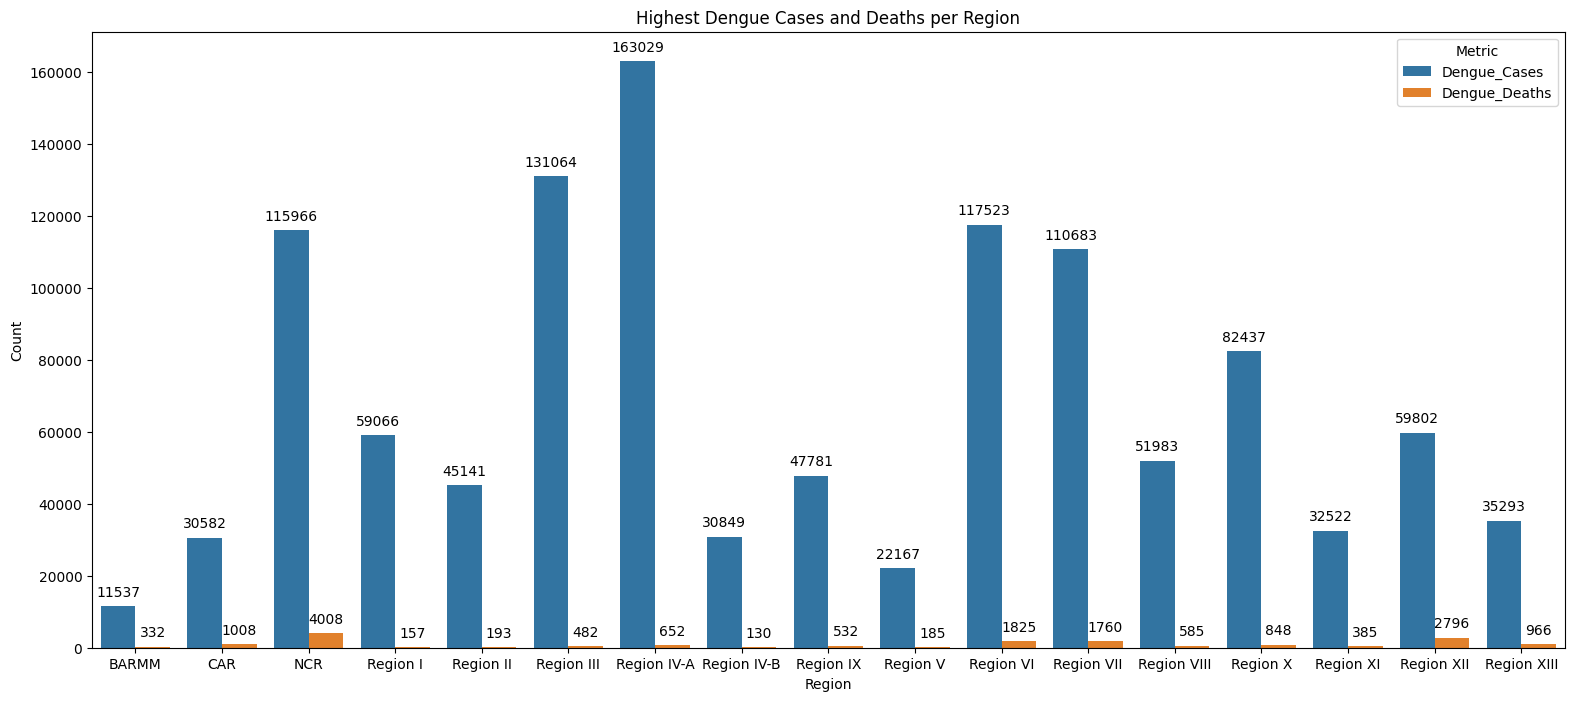

In [19]:
melted = pd.melt(data_dengue, id_vars='Region', value_vars=['Dengue_Cases', 'Dengue_Deaths'], var_name='Metric', value_name='Count')
ax = sns.barplot(data=melted, x='Region', y='Count', hue='Metric')
for x in ax.containers:
    ax.bar_label(x, padding=5)
plt.gcf().set_size_inches(19, 8)
plt.title('Highest Dengue Cases and Deaths per Region')
plt.show()

<h1>Insight No. 6 - 7</h1>
<p>Lowest dengue cases and deaths over the entire dataset</p>
<ul>
    <li>
        Region BARMM has the least cases and Region IV-B has the least deaths recorded.
    </li>
</ul>

In [20]:
data_dengue.sort_values(by='Dengue_Cases', ascending=True)
data_dengue

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


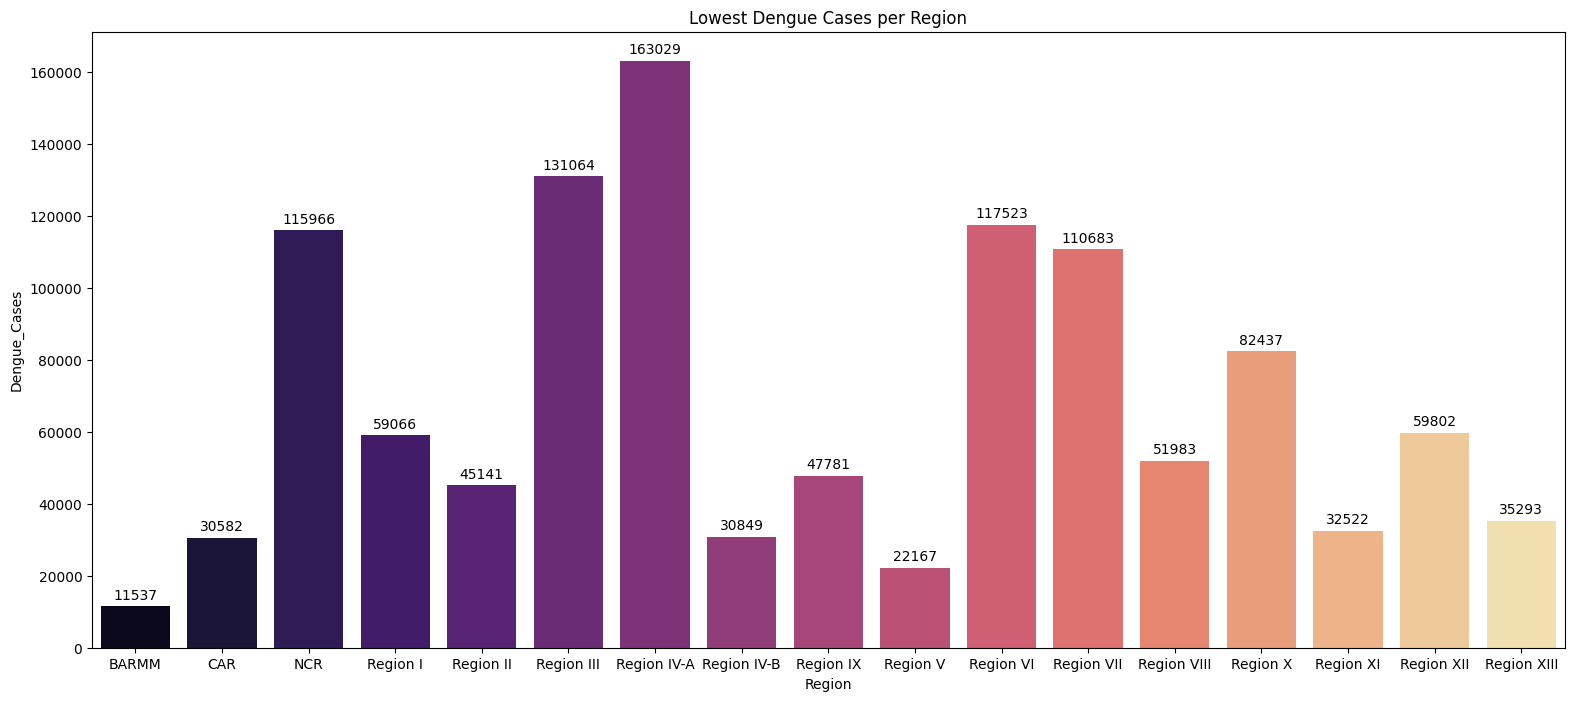

In [21]:
ax = sns.barplot(data=data_dengue, x='Region', y='Dengue_Cases', palette='magma')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Lowest Dengue Cases per Region')
plt.show()

In [22]:
data_dengue.sort_values(by='Dengue_Deaths', ascending=True)

,Region,Dengue_Cases,Dengue_Deaths
7,Region IV-B,30849,130
3,Region I,59066,157
9,Region V,22167,185
4,Region II,45141,193
0,BARMM,11537,332
14,Region XI,32522,385
5,Region III,131064,482
8,Region IX,47781,532
12,Region VIII,51983,585
6,Region IV-A,163029,652


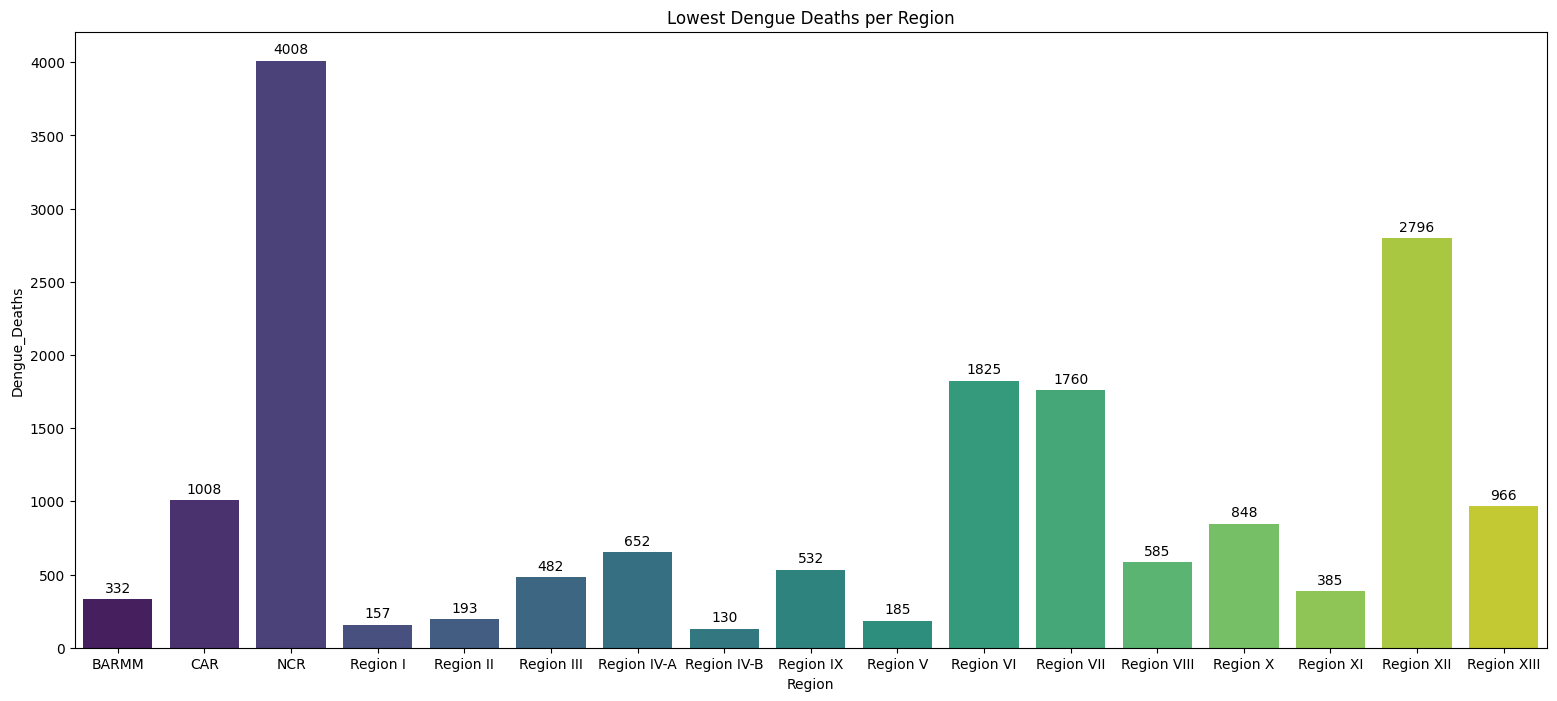

In [23]:
ax = sns.barplot(data=data_dengue, x='Region', y='Dengue_Deaths', palette='viridis')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Lowest Dengue Deaths per Region')
plt.show()

<h1>Insight No. 8</h1>
<p>Total dengue cases over the months</p>
<ul>
    <li>
        Month August has the most cases over the entire dataset. With records up to 187,554 cases.
    </li>
</ul>

In [24]:
monthly_sum = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sum['Month'] = pd.Categorical(monthly_sum['Month'], categories=month_order, ordered=True)
monthly_sum = monthly_sum.sort_values(['Month'])
monthly_sum

,Month,Dengue_Cases
4,January,84328
3,February,77801
7,March,57576
0,April,32508
8,May,32387
6,June,58110
5,July,138242
1,August,187554
11,September,177943
10,October,117645


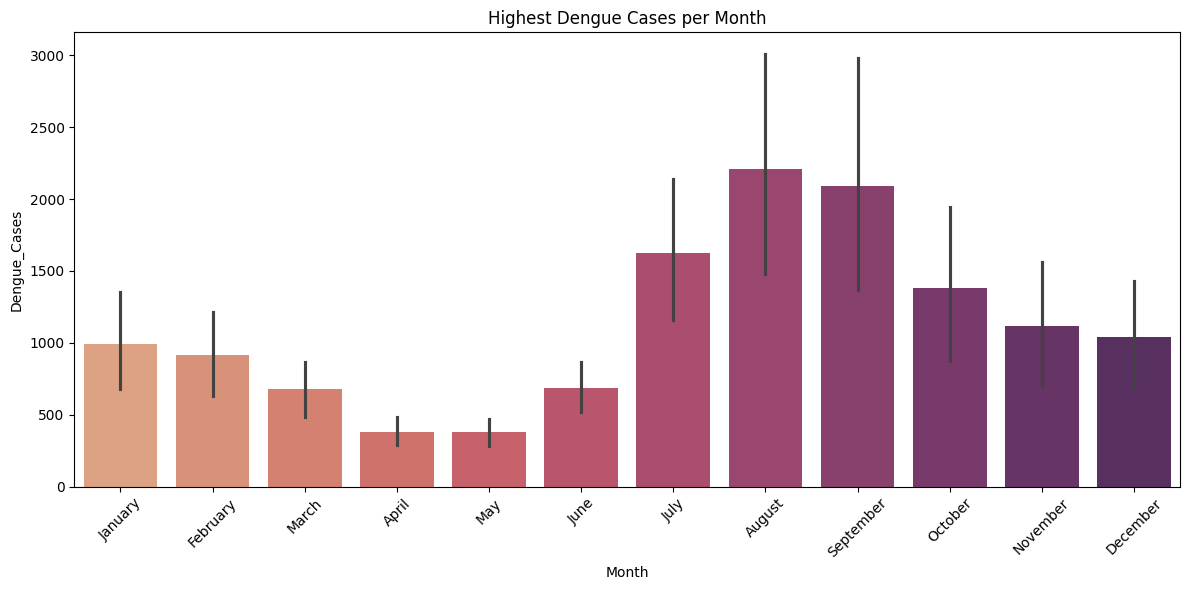

In [25]:
sns.barplot(data=monthly_average, x='Month', y='Dengue_Cases', palette='flare')    
plt.title('Highest Dengue Cases per Month')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 9</h1>
<p>Total dengue deaths over the months</p>
<ul>
    <li>
        Month August has the most cases over the entire dataset. With records up to 187,554 cases.
    </li>
</ul>

In [26]:
monthly_sum = dengue.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sum['Month'] = pd.Categorical(monthly_sum['Month'], categories=month_order, ordered=True)
monthly_sum = monthly_sum.sort_values(['Month'])
monthly_sum

,Month,Dengue_Deaths
4,January,394
3,February,315
7,March,291
0,April,200
8,May,162
6,June,322
5,July,611
1,August,714
11,September,6148
10,October,6670


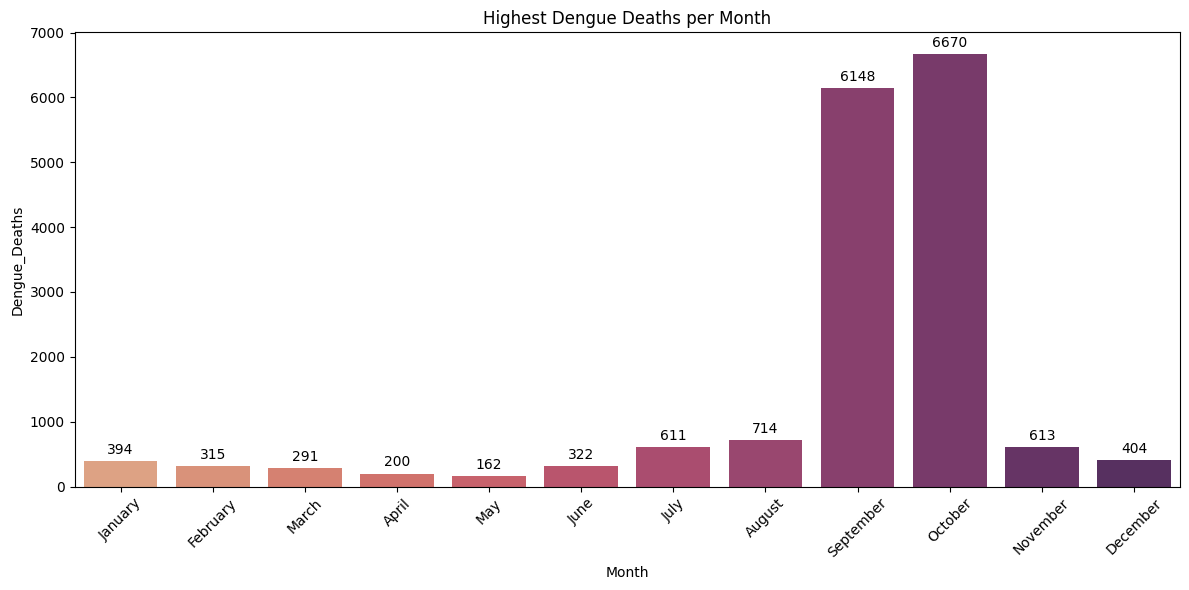

In [27]:
ax = sns.barplot(data=monthly_sum, x='Month', y='Dengue_Deaths', palette='flare')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.title('Highest Dengue Deaths per Month')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 10</h1>
<p>Average cases between regions and months</p>
<ul>
    <li>
        Using a heatmap to better visualize the data. It shows that dengue is more prominent in July to October. From regions NCR, III, IV-A, and VI
    </li>
</ul>

In [28]:
heatmap_data = dengue.groupby(['Region', 'Month'])['Dengue_Cases'].mean().reset_index()
pivot_data = heatmap_data.pivot(index='Region', columns='Month', values='Dengue_Cases')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data[month_order]

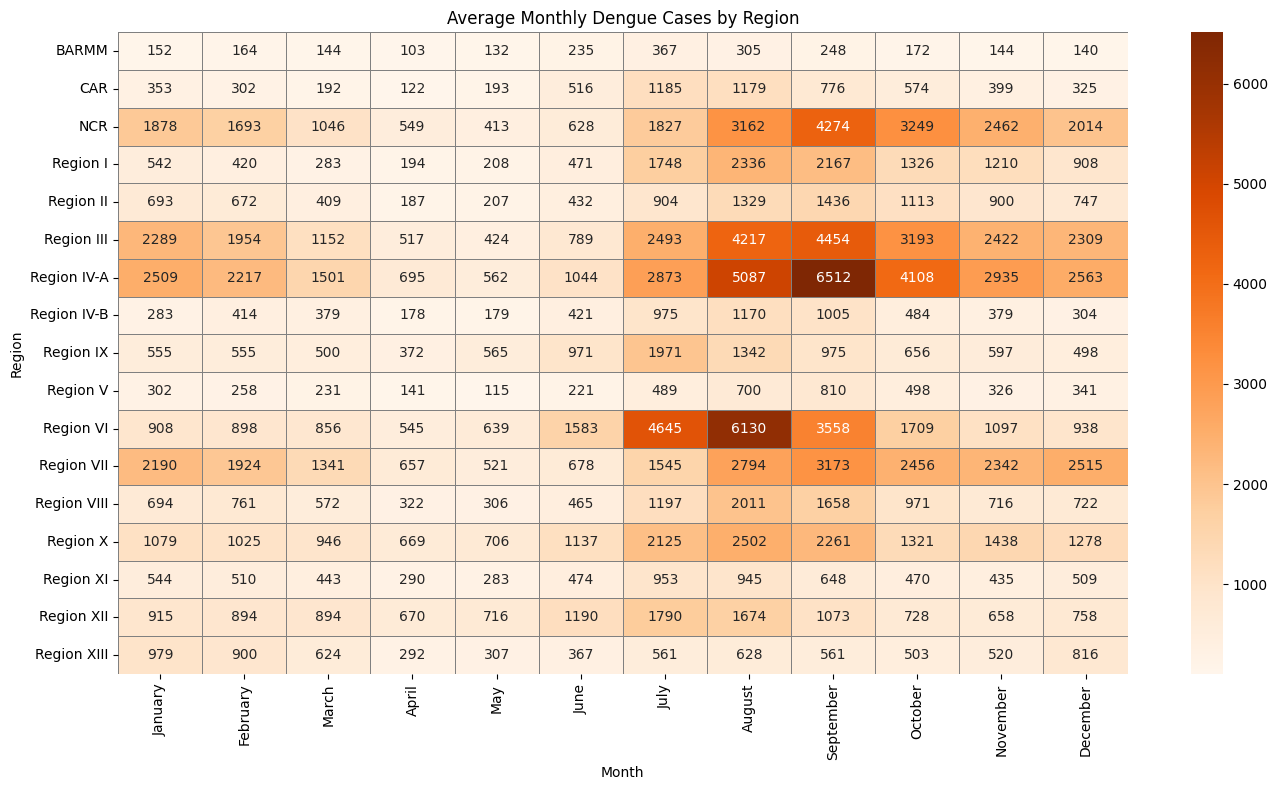

In [29]:
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='Oranges', linewidths=.5, linecolor='gray')
plt.title("Average Monthly Dengue Cases by Region")
plt.xlabel("Month")
plt.ylabel("Region")
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()
plt.show()

<h1>Insight No. 11</h1>
<p>Average cases between regions and months</p>
<ul>
    <li>
        Using a heatmap to better visualize the data. It shows deaths are scattered between regions III, IV-A, VI, VII, X, XII.
    </li>
    <li>
        But deaths piled in year 2019 in region IV-A with 6.350 records.
    </li>
</ul>

In [30]:
heatmap_data = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].mean().reset_index()
pivot_data = heatmap_data.pivot(index='Region', columns='Year', values='Dengue_Cases')
# month_order = ['January', 'February', 'March', 'April', 'May', 'June',
#                'July', 'August', 'September', 'October', 'November', 'December']
# pivot_data = pivot_data[month_order]

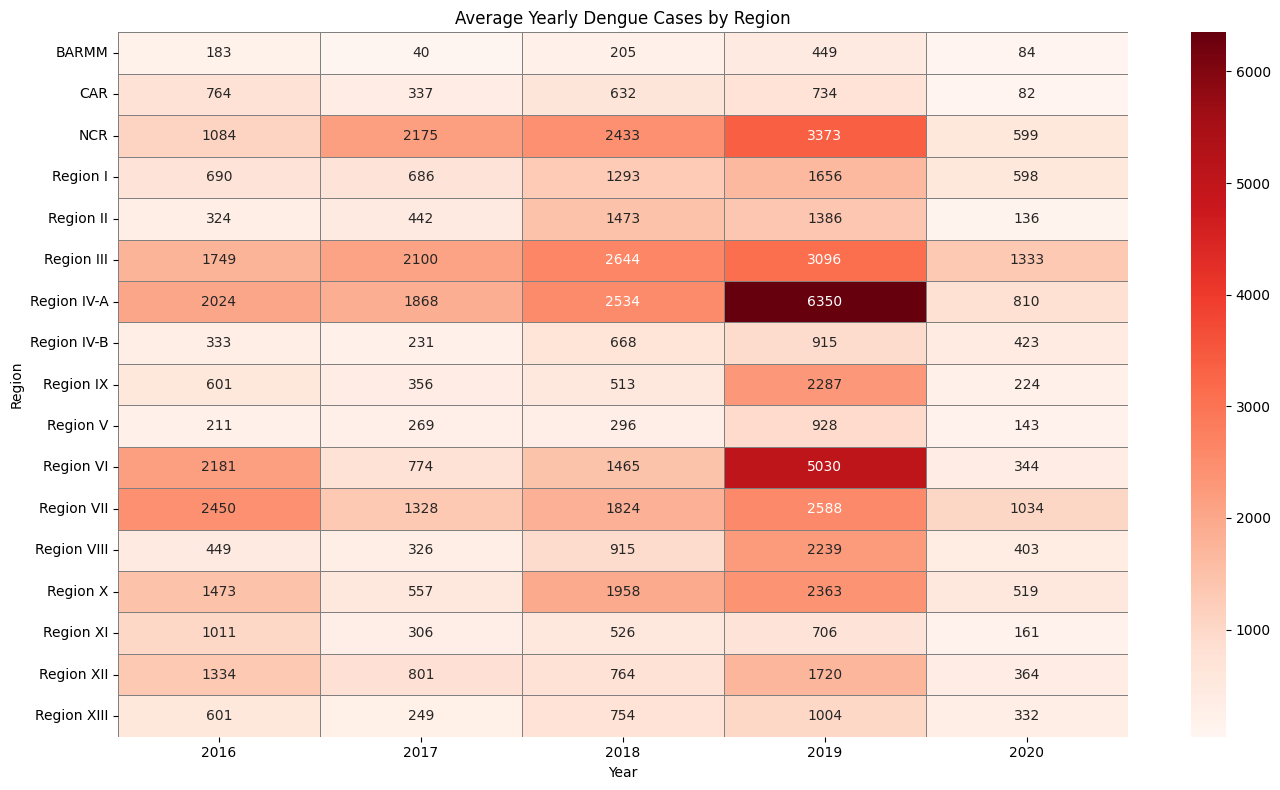

In [31]:
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='Reds', linewidths=.5, linecolor='gray')
plt.title("Average Yearly Dengue Cases by Region")
plt.xlabel("Year")
plt.ylabel("Region")
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()
plt.show()

<h1>Insight No. 12</h1>
<p>Correlation between Dengue cases and Dengue deaths</p>
<ul>
    <li>
        Dengue Cases and Deaths shows moderate to low correlation, as lots of patients diagnosed with dengue survives.
    </li>
    <li>
        They might have low correlation, but it shows causation.
    </li>
</ul>

In [32]:
dengue_corr = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
dengue_corr

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


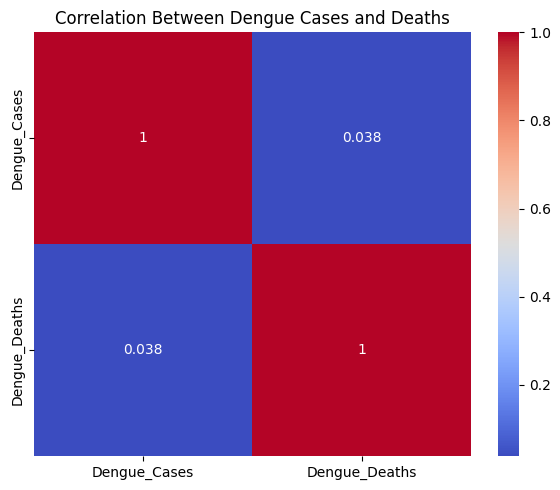

In [33]:
sns.heatmap(dengue_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Dengue Cases and Deaths')
plt.gcf().set_size_inches(6, 5)
plt.tight_layout()
plt.show()

<h1>Insight No. 13 - 14</h1>
<p>Mortality Rates between regions in percentage</p>
<ul>
    <li>
        Region XII has the highest mortality rate throughout the regions.
    </li>
    <li>
        While Region I has the lowest mortality rate with 0.27%.
    </li>
</ul>

In [34]:
dengue.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [35]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

In [36]:
mortality = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
mortality['Mortality_Rate'] = (mortality['Dengue_Deaths'] / mortality['Dengue_Cases']) * 100
mortality

,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,BARMM,11537,332,2.877698
1,CAR,30582,1008,3.296057
2,NCR,115966,4008,3.456185
3,Region I,59066,157,0.265804
4,Region II,45141,193,0.427549
5,Region III,131064,482,0.367759
6,Region IV-A,163029,652,0.399929
7,Region IV-B,30849,130,0.421408
8,Region IX,47781,532,1.113413
9,Region V,22167,185,0.834574


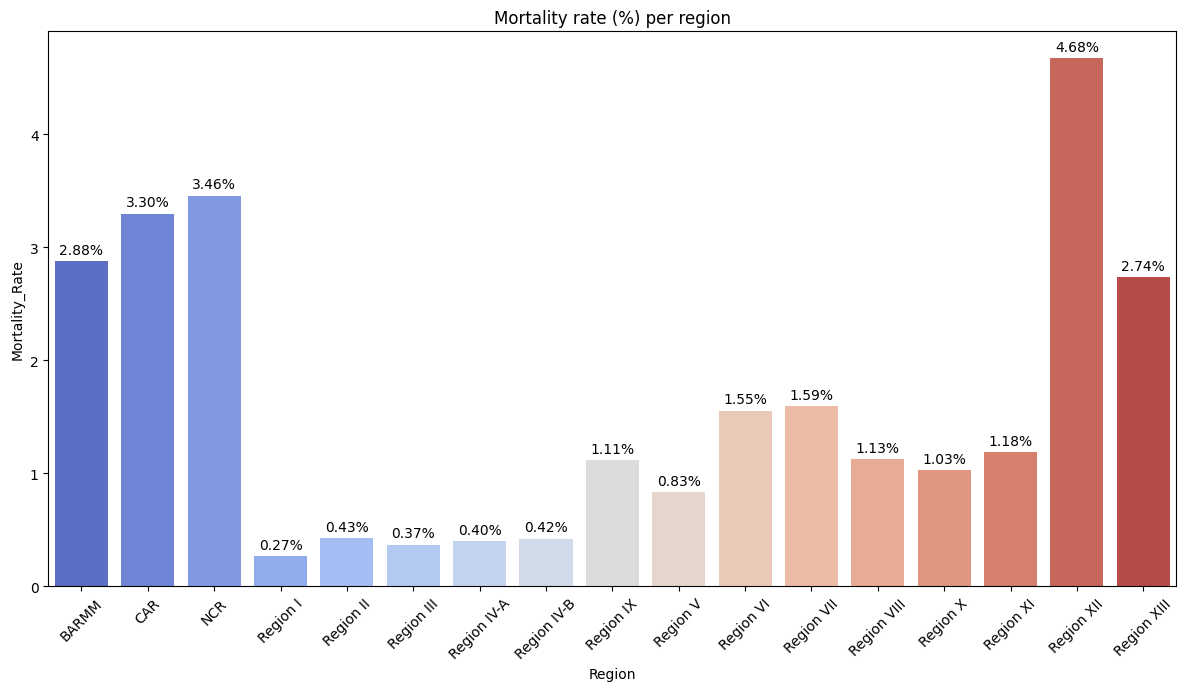

In [37]:
ax = sns.barplot(data=mortality, x='Region', y='Mortality_Rate', palette='coolwarm')

for x in ax.containers:
    ax.bar_label(x, fmt='%.2f%%', padding=3)

plt.title('Mortality rate (%) per region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_size_inches(13, 8)

<h1>Insight No. 15</h1>
<p>Mortality Rates between years in percentage</p>
<ul>
    <li>
        Year 2016 has the highest mortality rate with 3.88%.
    </li>
    <li>
        While Year 2019 has the lowest mortality rate with 0.39%.
    </li>
</ul>

In [38]:
mortality_year = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
mortality_year['Mortality_Rate'] = (mortality_year['Dengue_Deaths'] / mortality_year['Dengue_Cases']) * 100
mortality_year

,Year,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,2016,209544,8127,3.878422
1,2017,154155,4563,2.960008
2,2018,250783,1226,0.488869
3,2019,441902,1733,0.392168
4,2020,91041,1195,1.312595


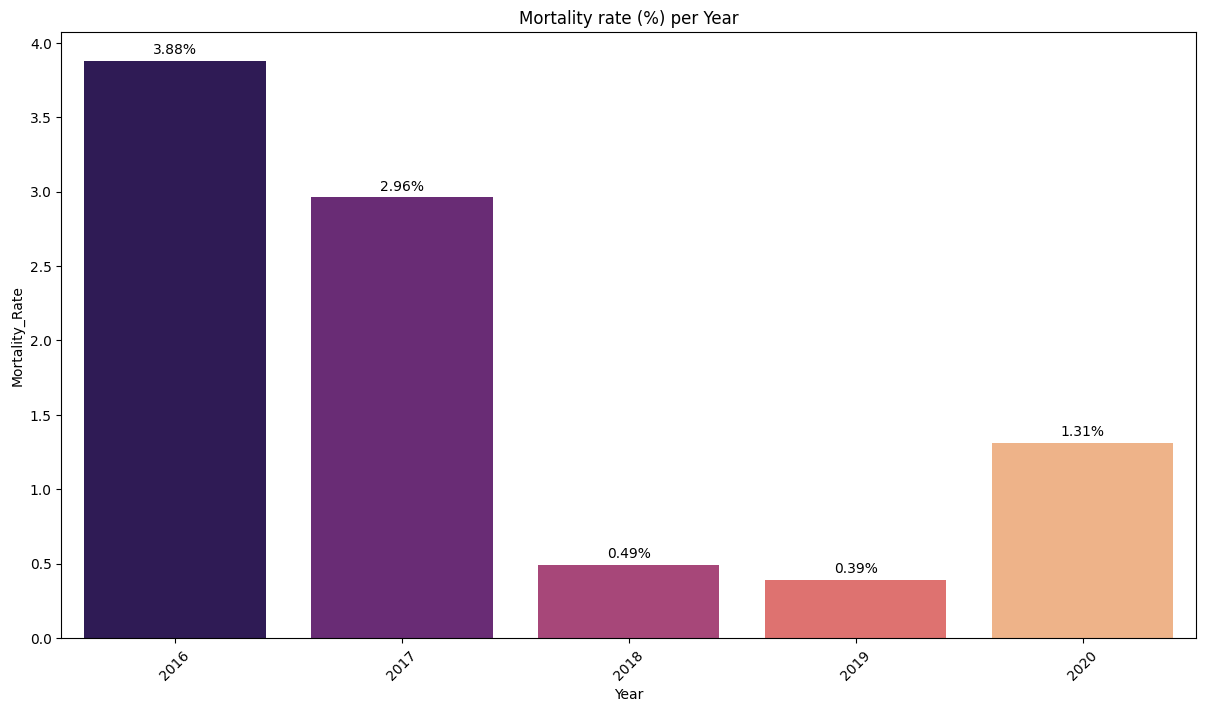

In [39]:
ax = sns.barplot(data=mortality_year, x='Year', y='Mortality_Rate', palette='magma')

for x in ax.containers:
    ax.bar_label(x, fmt='%.2f%%', padding=3)

plt.title('Mortality rate (%) per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_size_inches(13, 8)

<h1>Insight No. 16</h1>
<p>Average dengue cases per month in the year 2016</p>
<ul>
    <li>
        The month of August has the highest average throughout the year. With 2129.1 average cases
    </li>
    <li>
        While month of April is the lowest. Averaging 427.6.
    </li>
</ul>

In [43]:
dengue_2016 = dengue[dengue['Year'] == 2016]
dengue_2017 = dengue[dengue['Year'] == 2017]
dengue_2018 = dengue[dengue['Year'] == 2018]
dengue_2019 = dengue[dengue['Year'] == 2019]
dengue_2020 = dengue[dengue['Year'] == 2020]

In [54]:
monthly = dengue_2016.groupby('Month')['Dengue_Cases'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Month'] = pd.Categorical(monthly['Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(['Month'])
monthly = np.round(monthly, 1)
monthly

,Month,Dengue_Cases
4,January,1003.1
3,February,728.6
7,March,547.1
0,April,427.6
8,May,476.0
6,June,637.1
5,July,1749.6
1,August,2129.1
11,September,1587.6
10,October,1290.8


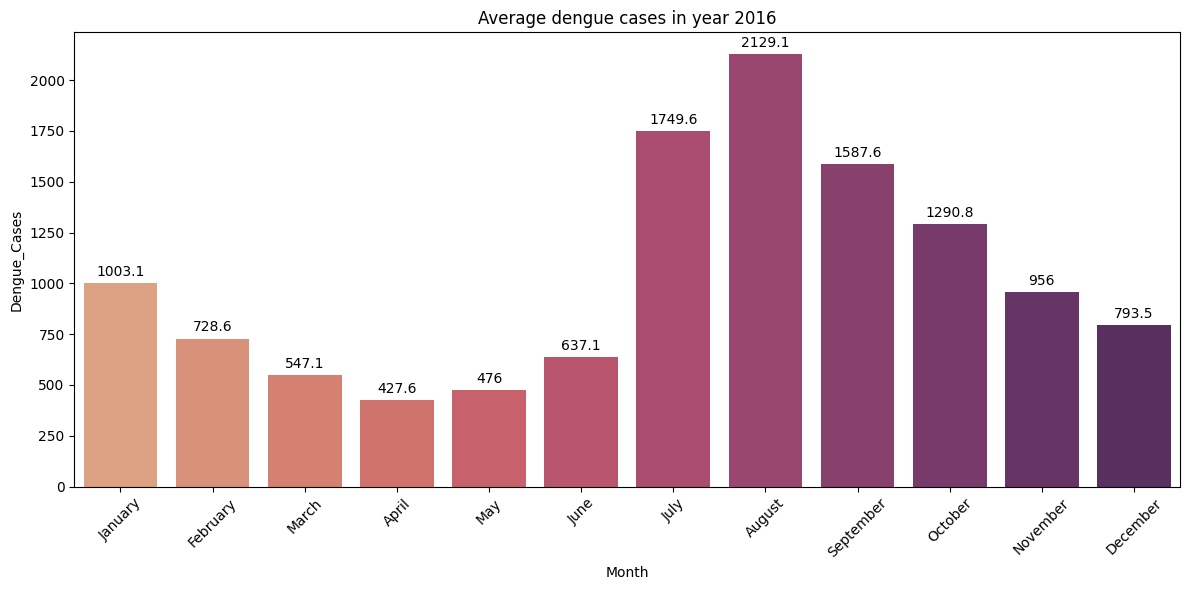

In [57]:
ax = sns.barplot(data=monthly, x='Month', y='Dengue_Cases', palette='flare')    

for x in ax.containers:
    ax.bar_label(x, padding=3)

plt.title('Average dengue cases in year 2016')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 17</h1>
<p>Average dengue cases per month in the year 20117</p>
<ul>
    <li>
        Still, the month of August has the highest average throughout the year. With 1472.2 average cases
    </li>
    <li>
        While month of May is the lowest. Averaging 285.5.
    </li>
</ul>

In [58]:
monthly = dengue_2017.groupby('Month')['Dengue_Cases'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Month'] = pd.Categorical(monthly['Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(['Month'])
monthly = np.round(monthly, 1)
monthly

,Month,Dengue_Cases
4,January,919.0
3,February,580.7
7,March,452.7
0,April,373.1
8,May,285.5
6,June,446.4
5,July,1078.8
1,August,1472.9
11,September,1044.3
10,October,897.6


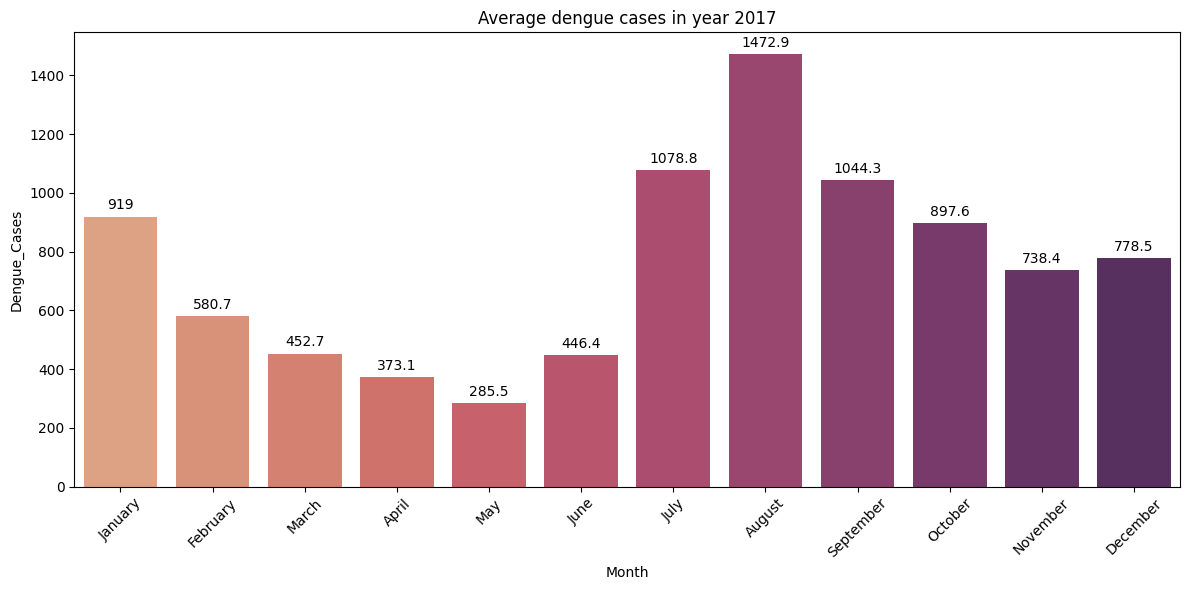

In [60]:
ax = sns.barplot(data=monthly, x='Month', y='Dengue_Cases', palette='flare')    

for x in ax.containers:
    ax.bar_label(x, padding=3)

plt.title('Average dengue cases in year 2017')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 18</h1>
<p>Average dengue cases per month in the year 2018</p>
<ul>
    <li>
        The month of September has the highest average throughout the year. With 2271.6 average cases
    </li>
    <li>
        While month of April is the lowest. Averaging 387.9.
    </li>
</ul>

In [61]:
monthly = dengue_2018.groupby('Month')['Dengue_Cases'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Month'] = pd.Categorical(monthly['Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(['Month'])
monthly = np.round(monthly, 1)
monthly

,Month,Dengue_Cases
4,January,744.5
3,February,615.6
7,March,467.3
0,April,403.5
8,May,387.9
6,June,676.6
5,July,1786.1
1,August,2012.4
11,September,2271.6
10,October,1766.2


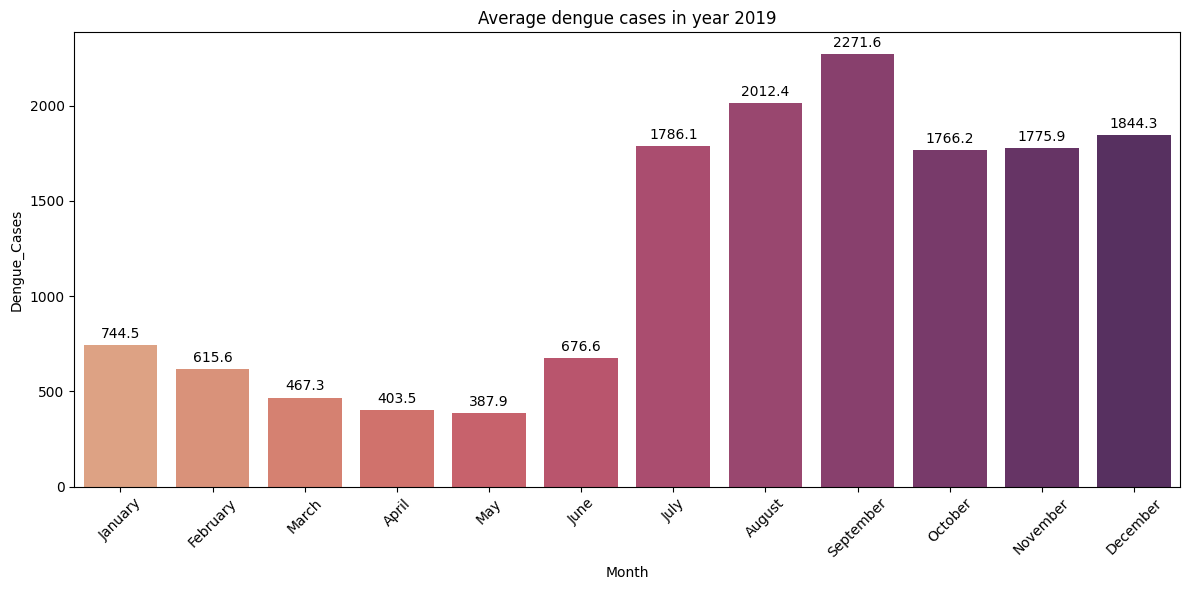

In [62]:
ax = sns.barplot(data=monthly, x='Month', y='Dengue_Cases', palette='flare')    

for x in ax.containers:
    ax.bar_label(x, padding=3)

plt.title('Average dengue cases in year 2018')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 16</h1>
<p>Average dengue cases per month in the year 2019</p>
<ul>
    <li>
        The month of September has the highest average throughout the year. With 5273.1 average cases
    </li>
    <li>
        While month of April is the lowest. Averaging 544.2.
    </li>
</ul>

In [63]:
monthly = dengue_2019.groupby('Month')['Dengue_Cases'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Month'] = pd.Categorical(monthly['Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(['Month'])
monthly = np.round(monthly, 1)
monthly

,Month,Dengue_Cases
4,January,1216.0
3,February,1499.6
7,March,1164.6
0,April,544.2
8,May,611.0
6,June,1501.4
5,July,3248.2
1,August,5002.2
11,September,5273.1
10,October,2728.4


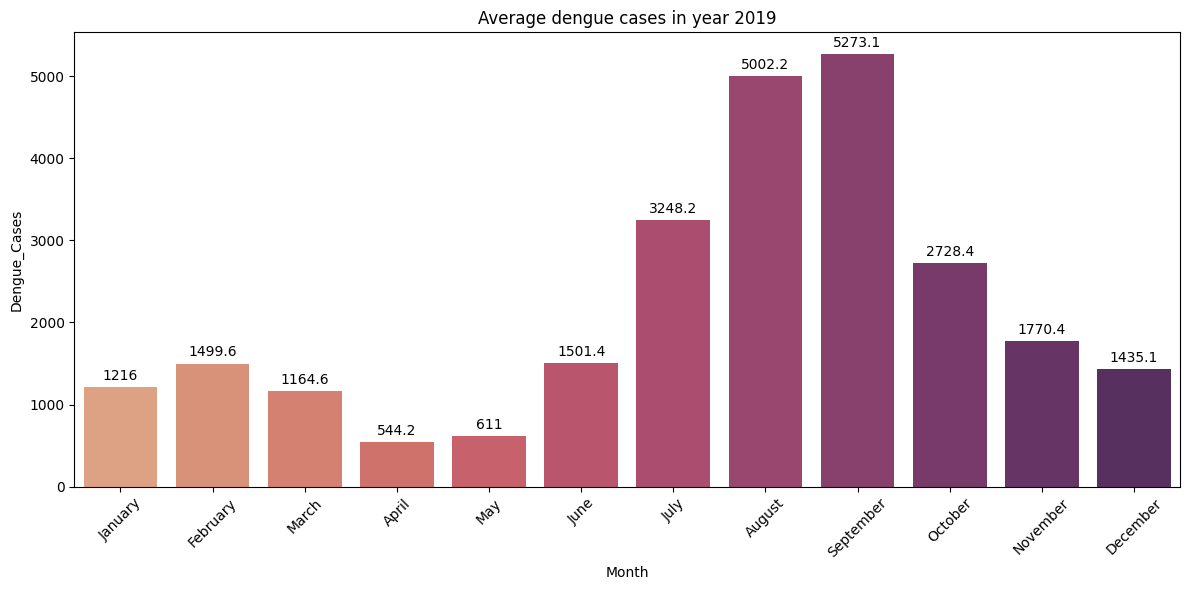

In [64]:
ax = sns.barplot(data=monthly, x='Month', y='Dengue_Cases', palette='flare')    

for x in ax.containers:
    ax.bar_label(x, padding=3)

plt.title('Average dengue cases in year 2019')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No. 16</h1>
<p>Average dengue cases per month in the year 2020</p>
<ul>
    <li>
        The month of February has the highest average throughout the year. With 1151.9 average cases
    </li>
    <li>
        While month of May is the lowest. Averaging 144.8.
    </li>
</ul>

In [65]:
monthly = dengue_2020.groupby('Month')['Dengue_Cases'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Month'] = pd.Categorical(monthly['Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(['Month'])
monthly = np.round(monthly, 1)
monthly

,Month,Dengue_Cases
4,January,1077.9
3,February,1151.9
7,March,755.2
0,April,163.8
8,May,144.8
6,June,156.8
5,July,269.1
1,August,416.0
11,September,290.6
10,October,237.4


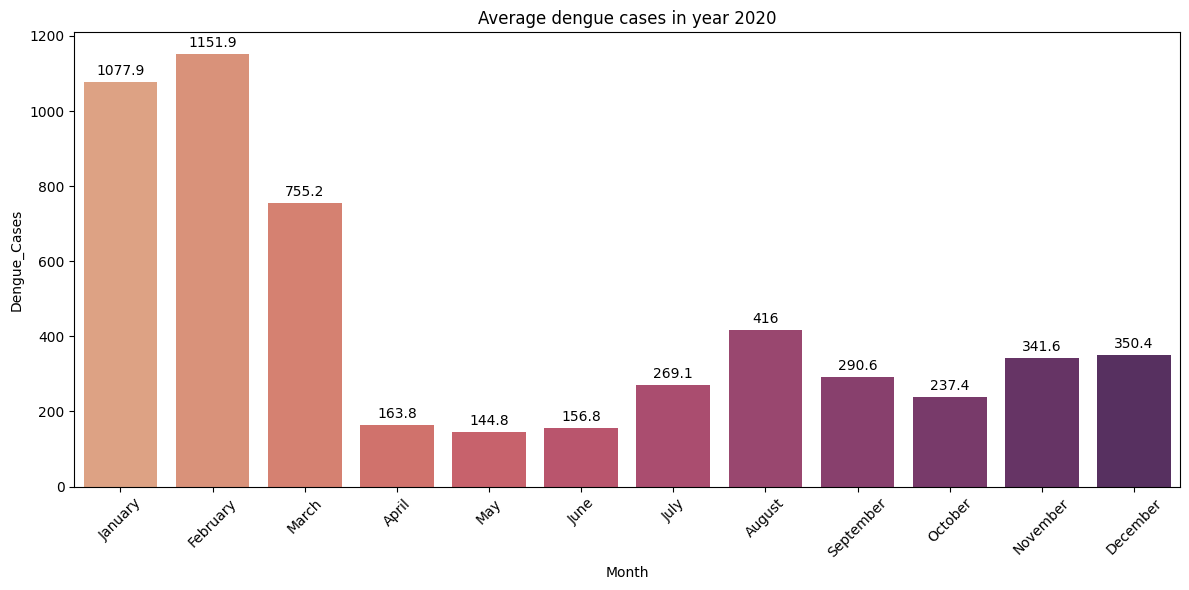

In [66]:
ax = sns.barplot(data=monthly, x='Month', y='Dengue_Cases', palette='flare')    

for x in ax.containers:
    ax.bar_label(x, padding=3)

plt.title('Average dengue cases in year 2020')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()